Notebook to help visualize and check assets, funcionts, and process

In [37]:
from functions import new
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as xp

In [2]:
asset = new("LTC")

In [15]:
asset.df["sma"] = asset.sma(7)

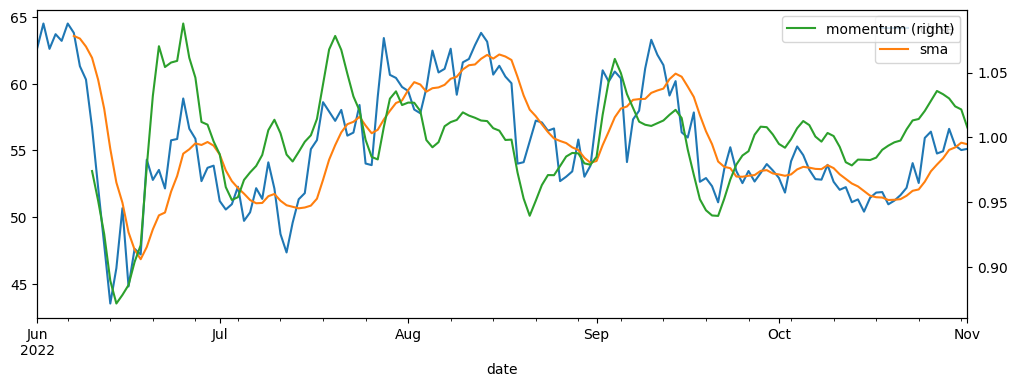

In [18]:
asset.df[["close", "sma"]].plot(figsize = (12,4))
asset.momentum( 3, target="sma" ).plot(secondary_y = True, label = "momentum")
plt.legend()

# Read results

In [73]:
df = pd.read_csv( "momentum_results.csv" )
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [74]:
df[[ "frequency", "strategy", "strategy_time", "optimization", "risk", "optimization_params" ]] = df.route.str.split("/", expand = True)
df["frequency"] = df[ "frequency" ].apply( lambda x: pd.Series( x.split("\\")[-1] ) )
df["frequency_period"] = df["frequency"] + "_" + df["periods"].astype(str)
df["optimization_params"] = df[ "optimization_params" ].apply( lambda x: pd.Series( x.split("_")[-1] ) )

In [75]:
df.head()

,route,sharpe,sortino,std,neg std,min net,acc,mean net,frequency,periods,strategy,strategy_time,optimization,risk,optimization_params,frequency_period
0,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.023842,0.023089,0.036268,0.037451,-0.149647,1.011435,0.000865,3h_8,2,LowestMomentum_2,50_,efficientsemivariance,minsemivariance,40,3h_8_2
1,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.020905,0.019466,0.038307,0.041138,-0.156347,1.002427,0.000801,3h_8,2,LowestMomentum_2,50_,efficientsemivariance,minsemivariance,20,3h_8_2
2,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.014264,0.013314,0.035840,0.038397,-0.144313,0.991051,0.000511,3h_8,2,LowestMomentum_2,50_,efficientfrontier,minvol,40,3h_8_2
3,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,-0.006026,-0.005363,0.037220,0.041823,-0.170544,0.944779,-0.000224,3h_8,2,LowestMomentum_2,50_,efficientfrontier,minvol,20,3h_8_2
4,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.030474,0.027327,0.038090,0.042475,-0.168037,1.025038,0.001161,3h_8,3,LowestMomentum_3,50_,efficientfrontier,minvol,20,3h_8_3


In [57]:
xp.box( df, x = "frequency_period", y = "acc" ).show()

In [76]:
xp.box( df, x = "optimization", y = "acc", color = "optimization_params" ).show()

No importa mucho el modelo de optimizacion de portafolio, puesto que sus distribuciones se ven similares.
Se puede ver que semivariance tiene una distribucion mas corta, por lo que tiene menos outliers negativos, lo cual es deseado penalizar.

In [79]:
dff = df[ ( df["frequency_period"] == "6h_4_4" ) & (df[ "optimization" ] == "efficientsemivariance") ]

In [80]:
dff

,route,sharpe,sortino,std,neg std,min net,acc,mean net,frequency,periods,strategy,strategy_time,optimization,risk,optimization_params,frequency_period
56,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.140015,0.141255,0.031484,0.031208,-0.127466,1.263999,0.004408,6h_4,4,LowestMomentum_4,50_,efficientsemivariance,minsemivariance,40,6h_4_4
59,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.074153,0.072109,0.031285,0.032171,-0.127503,1.115704,0.002320,6h_4,4,LowestMomentum_4,50_,efficientsemivariance,minsemivariance,20,6h_4_4


In [87]:
best = pd.read_csv("momentum_results_best.csv")
best.drop(columns = ["Unnamed: 0"], inplace = True)
# best.sort_values( by = "acc", ascending = False, inplace = True )

In [88]:
best.head()

,route,sharpe,sortino,std,neg std,min net,acc,mean net,frequency,periods
0,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.030474,0.027327,0.038090,0.042475,-0.168037,1.025038,0.001161,3h,3
1,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.014294,0.016287,0.035012,0.030729,-0.127704,0.993563,0.000500,3h,3
2,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.013770,0.013694,0.034106,0.034294,-0.140304,0.993002,0.000470,3h,3
3,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.009202,0.009985,0.035133,0.032377,-0.136772,0.982639,0.000323,3h,3
4,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,-0.000673,-0.000770,0.036015,0.031479,-0.126511,0.960569,-0.000024,3h,3


In [89]:
best[[ "frequency", "strategy", "strategy_time", "optimization", "risk", "optimization_params" ]] = df.route.str.split("/", expand = True)
best["frequency"] = df[ "frequency" ].apply( lambda x: pd.Series( x.split("\\")[-1] ) )
best["frequency_period"] = df["frequency"] + "_" + df["periods"].astype(str)
best["optimization_params"] = df[ "optimization_params" ].apply( lambda x: pd.Series( x.split("_")[-1] ) )

In [92]:
best

,route,sharpe,sortino,std,neg std,min net,acc,mean net,frequency,periods,strategy,strategy_time,optimization,risk,optimization_params,frequency_period
0,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.030474,0.027327,0.038090,0.042475,-0.168037,1.025038,0.001161,3h_8,3,LowestMomentum_2,50_,efficientsemivariance,minsemivariance,40,3h_8_2
1,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.014294,0.016287,0.035012,0.030729,-0.127704,0.993563,0.000500,3h_8,3,LowestMomentum_2,50_,efficientsemivariance,minsemivariance,20,3h_8_2
2,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.013770,0.013694,0.034106,0.034294,-0.140304,0.993002,0.000470,3h_8,3,LowestMomentum_2,50_,efficientfrontier,minvol,40,3h_8_2
3,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.009202,0.009985,0.035133,0.032377,-0.136772,0.982639,0.000323,3h_8,3,LowestMomentum_2,50_,efficientfrontier,minvol,20,3h_8_2
4,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,-0.000673,-0.000770,0.036015,0.031479,-0.126511,0.960569,-0.000024,3h_8,3,LowestMomentum_3,50_,efficientfrontier,minvol,20,3h_8_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.011749,0.013789,0.039054,0.033278,-0.163304,0.982830,0.000459,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
176,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.012586,0.016858,0.041871,0.031261,-0.144665,0.982147,0.000527,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
177,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.010600,0.012628,0.038418,0.032246,-0.167069,0.981157,0.000407,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
178,C:\Users\ramon\Documents\Trading\WorkingDir\bi...,0.007921,0.009435,0.039759,0.033379,-0.141662,0.973012,0.000315,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
xp.box( best, x = "frequency_period", y = "acc" ).show()

In [91]:
xp.box( best, x = "optimization", y = "acc", color = "optimization_params" ).show()